# Supervised Learning Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Gather data, determine the method of data collection and provenance of the data

I obtained the heart disease dataset from kaggle here: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?select=heart.csv

In [2]:
df = pd.read_csv('data/heart.csv')

### Step 2: Identify a Supervised Machine Learning Problem

From Kaggle: This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

My initial understanding of this dataset is that the dataset allows one to predict heart disease in an individual based on various medical attributes. It will be a classification problem where the goal is to identify whether someone has heart disease or not.

- Type of learning: This project will allow me to apply the supervised learning techniques as the dataset is labeled and has a target variable.
- Type of Task: The type of task will be binary classification as the goal is to predict whether someone has heart disease or not.

This dataset has a lot of numerical values and is therefore a great dataset to use for Logistic Regression. Logistic regression requires labeled dataset to learn and make predictions. The target variable in particular has boolean values and therefore Logistic regression is great as it's a binary classiciation algorithm.

The goal of the project is to predict the presence of heart disease in patients. The "target" field in the dataset is the key attribute that indicates whether a patient has heart disease or not. The values are binary: 0 stands for "no disease" and 1 stands for "disease."

### Step 3: Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data

#### Describe the factors or components that make up the dataset (The "factors" here are called "features" in the machine learning term. These factors are often columns in the tabulated data). For each factor, use a box-plot, scatter plot, histogram, etc., to describe the data distribution as appropriate.

The features of this dataset are:
1. age: age in years
2. sex: 1 = male; 0 = female
3. cp: chest pain type (4 values)
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholesterol in mg/dl
6. fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. restecg: resting electrocardiographic results (values 0,1,2)
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) colored by fluoroscopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversible defect
14. target: whether someone has heart disease or not

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


From the information column, there seem to be no null values, with most columns being integeres and only 'oldpeak' being a float. There are a total of 14 columns. Therefore, it has a shape of (1025,14)

In [5]:
# Find the min and max values using describe
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# Find out the number of missing rows per column
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

As can be seen, there are no null values in the dataset.

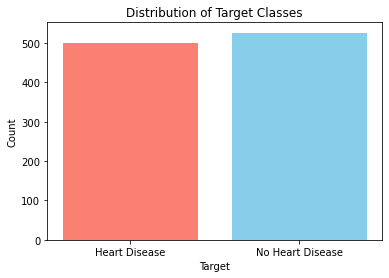

In [7]:
# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(df['target'].value_counts().index, df['target'].value_counts().values, color=['skyblue', 'salmon'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target Classes')
plt.xticks(df['target'].value_counts().index, ['No Heart Disease', 'Heart Disease'])
plt.show()

From the plot above, it can be seen that we have a fairly equal number of data for both people with heart disease and no heart disease.

#### Describe correlations between different factors of the dataset and justify your assumption that they are correlated or not correlated. You may use numeric or qualitative/graphical analysis for this step.

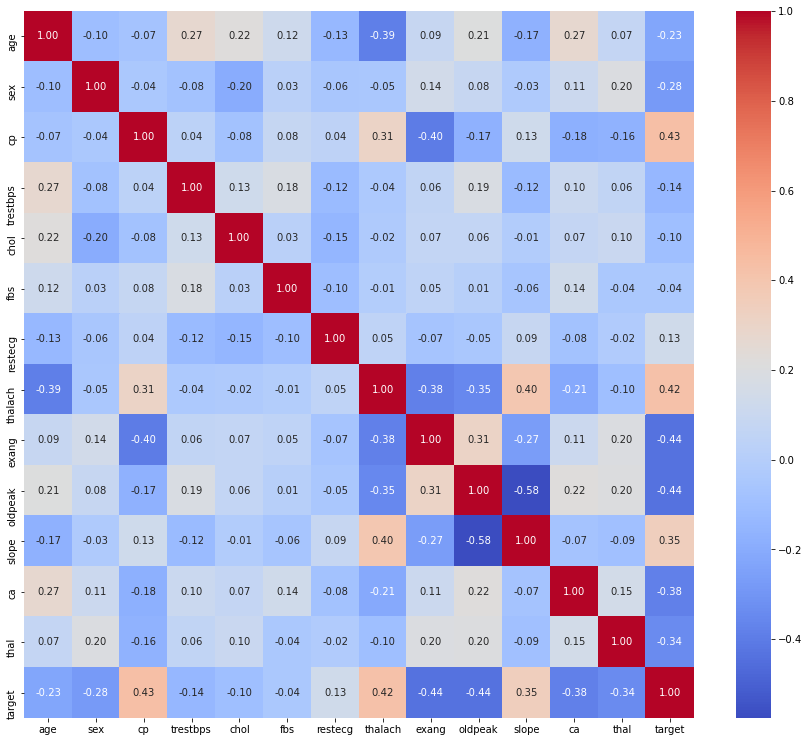

In [8]:
# heatmap
plt.figure(figsize=(15,13))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.rcParams['font.size'] = 15

plt.show()

Based on the correlation matrix, it seems that the following features have a positive correlation with target:
- target and cp
- target and thalach
- target and slope

The following features seem to be correlation with each other (collinearity):
- thalack and slope

The following features have a nevative correlation with target:
- target and exang
- target and oldpeak
- target and ca
- target and thal

#### Determine if any data needs to be transformed. For example, if you're planning on using an SVM method for prediction, you may need to normalize or scale the data if there is a considerable difference in the range of the data.

I will be considerting a log of the features in order to transform the data. I will also scale features so that they are all at the same level.

In order to better understand multicollinearity, the **Variance Inflation Factor (VIF)** will be useful as if there is no multicollinearity, the VIF should be 1; while values higher than 5 indicate high collinearity.

In [9]:
# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.Series([variance_inflation_factor(df.values, i) for i in range(df.shape[1])], index=df.columns)

age         38.882441
sex          3.792920
cp           2.566095
trestbps    57.978546
chol        26.208367
fbs          1.272173
restecg      2.073125
thalach     47.110371
exang        2.111290
oldpeak      3.182085
slope        9.990892
ca           1.960731
thal        17.183907
target       4.108633
dtype: float64

As can be seen above, all variables have a VIF greater than 1. Next, I will also look at correlations between the x variables and the y variable.

In [10]:
# Let's only look at the correlations with the y variable:
df_target = df.corr()
df_target['target'].sort_values()

oldpeak    -0.438441
exang      -0.438029
ca         -0.382085
thal       -0.337838
sex        -0.279501
age        -0.229324
trestbps   -0.138772
chol       -0.099966
fbs        -0.041164
restecg     0.134468
slope       0.345512
thalach     0.422895
cp          0.434854
target      1.000000
Name: target, dtype: float64

The variable which correlates with target the most is `cp`, as was observed in the heatmap. Other notable ones are thalack, and slope.

It should be noted that oldpeak, exang, and ca have a negative correlation.

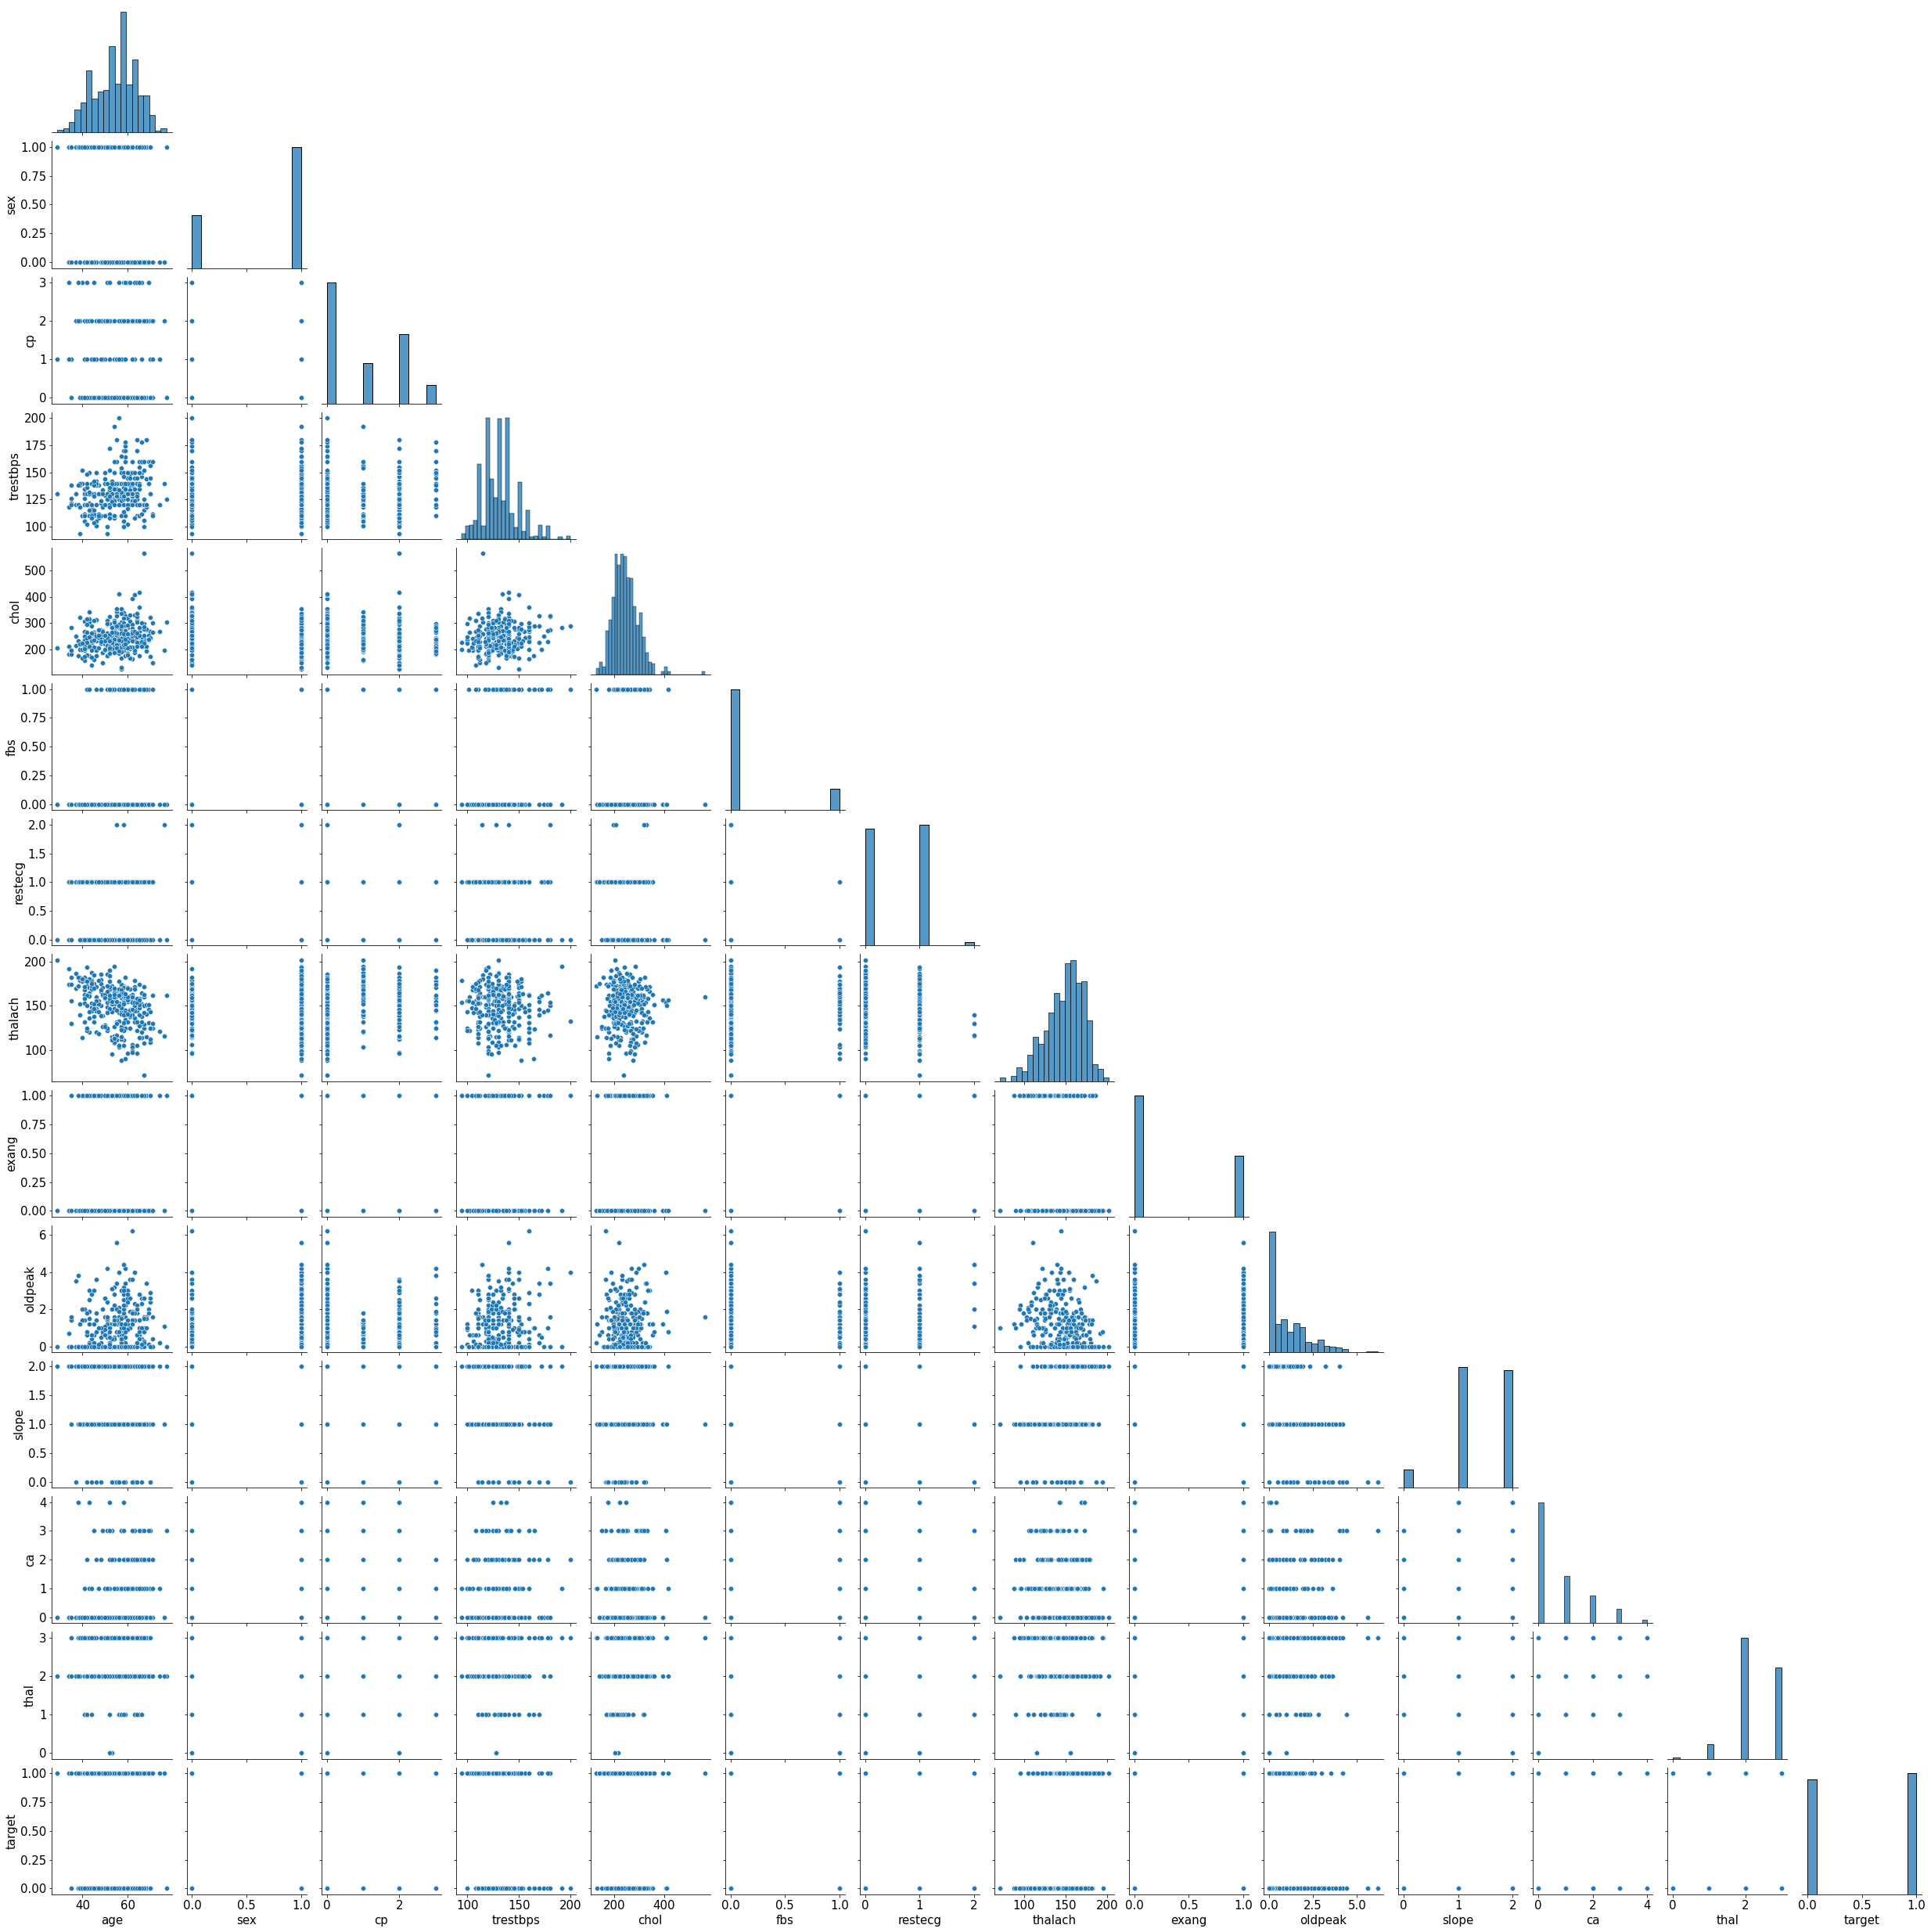

In [11]:
# Use seaborn pairplot to look for collinearity in X variables
sns.pairplot(df, corner=True)
plt.show()

#### Using your hypothesis, indicate if it's likely that you should transform data, such as using a log transform or other transformation of the dataset.

I will be doing a log transform now.

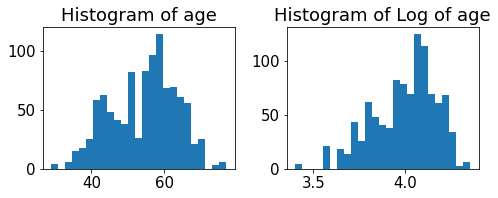

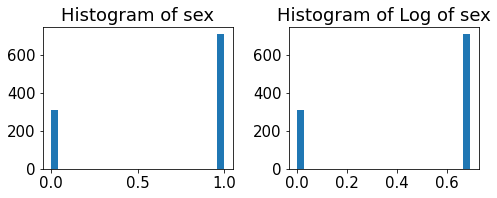

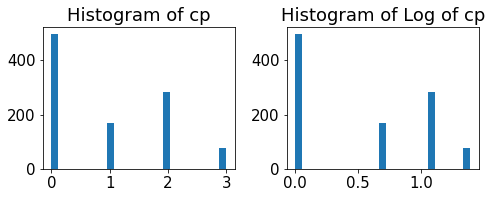

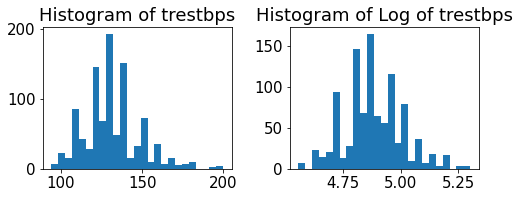

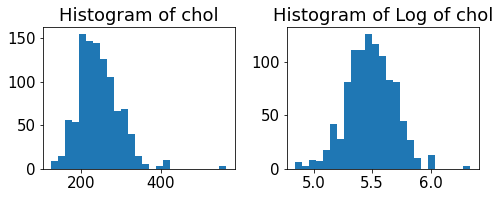

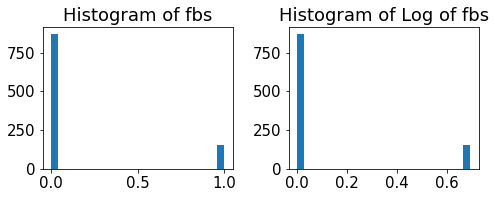

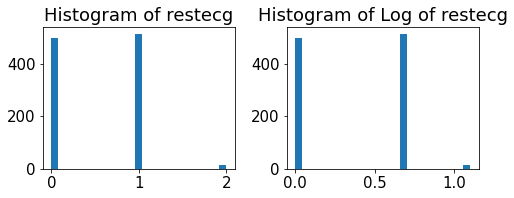

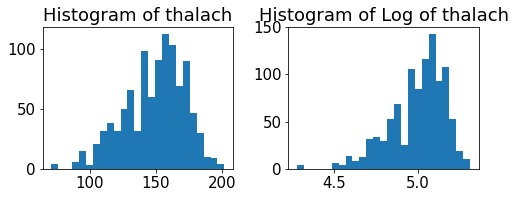

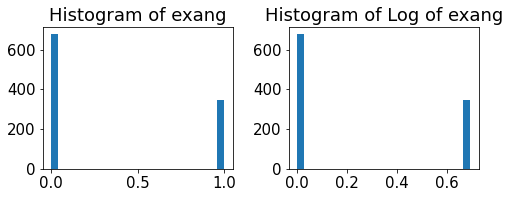

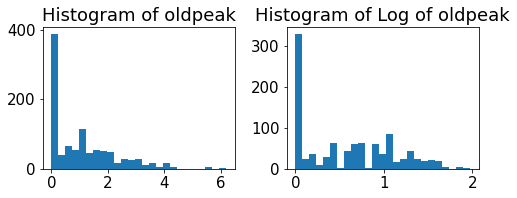

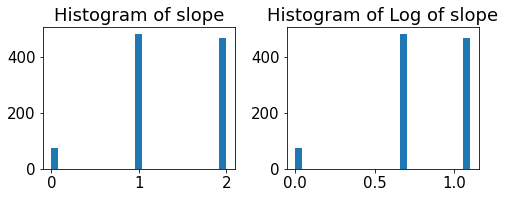

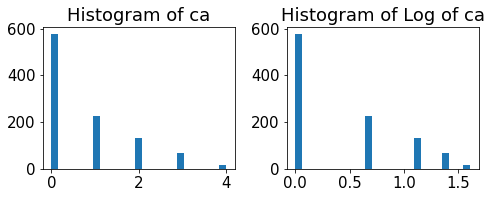

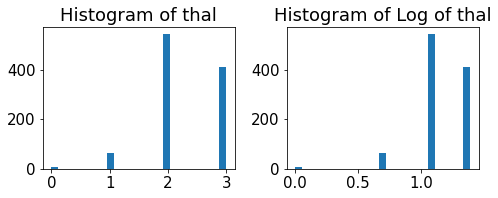

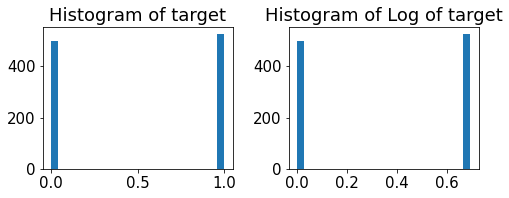

In [12]:
df2 = np.log(df+1)
for column in df.columns:
    
    plt.subplots(1,2, figsize=(7,3))
    
    # plot original hist
    plt.subplot(1,2,1)
    plt.hist(df[column], bins=25)
    plt.title(f'Histogram of {column}')
    
    # plot transformed hist
    plt.subplot(1,2,2)
    plt.hist(df2[column], bins=25)
    plt.title(f'Histogram of Log of {column}')
    
    plt.tight_layout()
    plt.show()

After applying log, it seems that some of the features have a better normal distribution such as cholestrol but overall, there is not a huge difference.

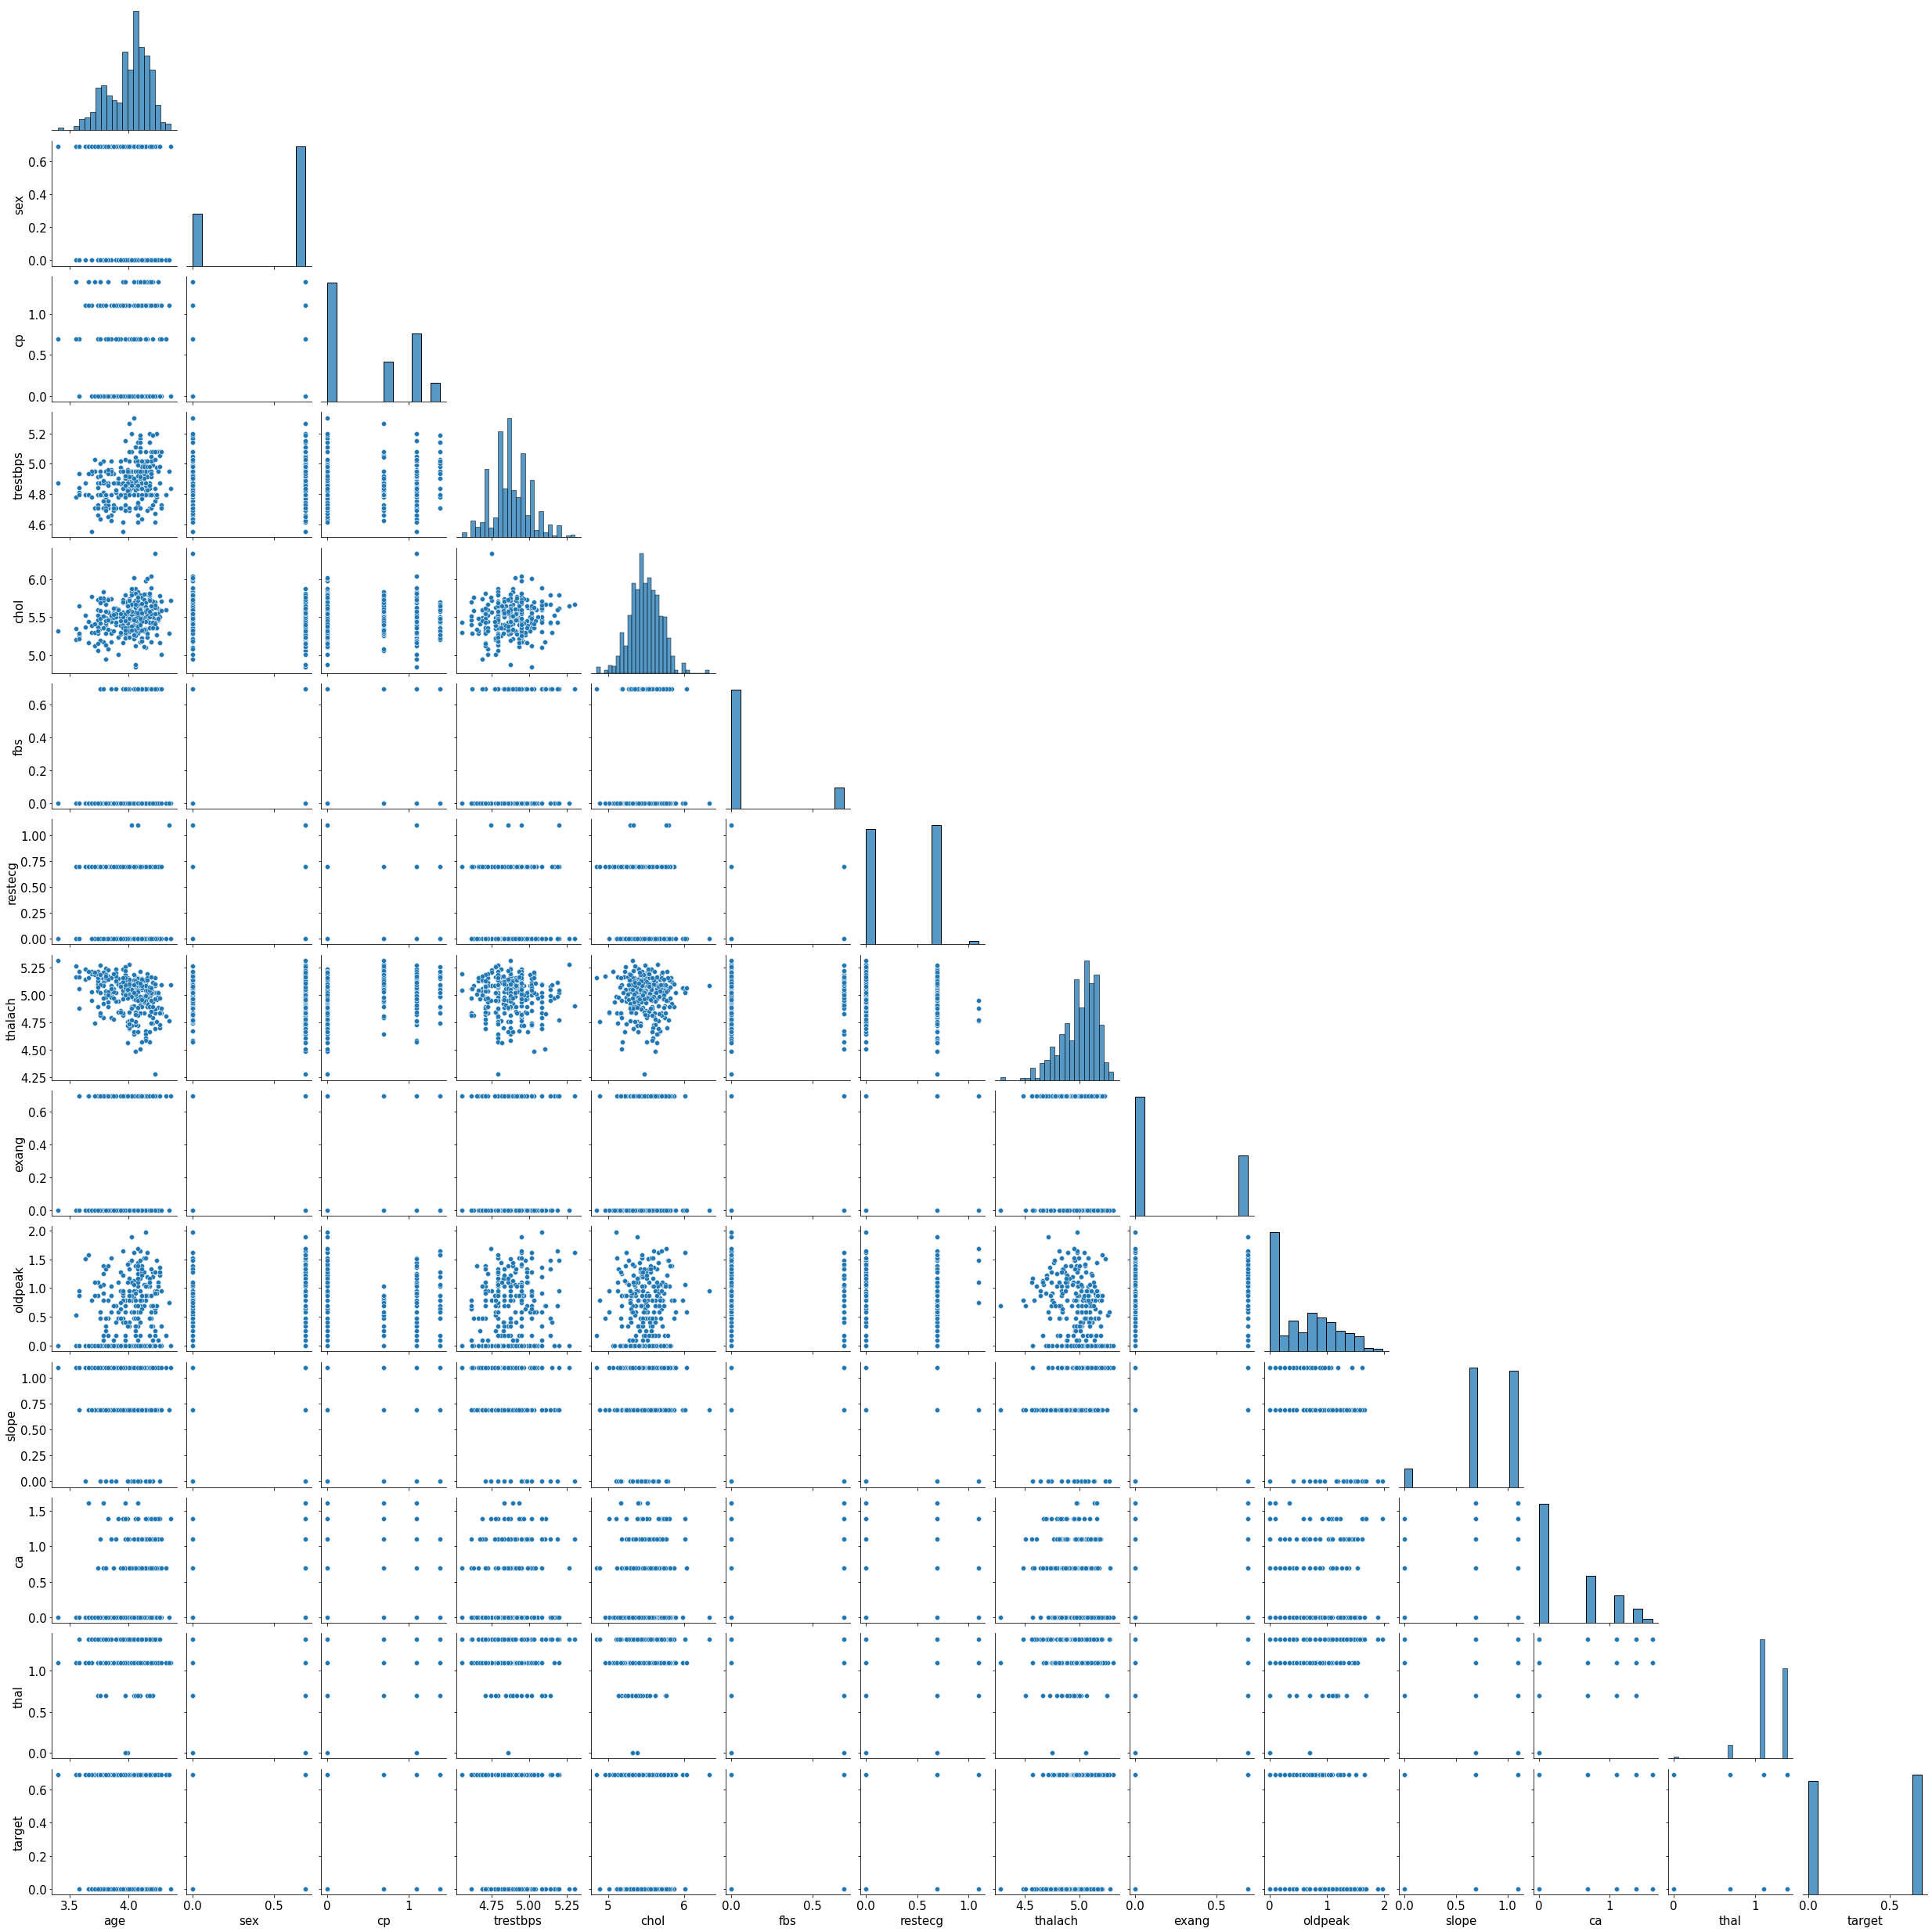

In [13]:
# looking at pairplot again:
sns.pairplot(df2, corner=True)

In [14]:
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,3.970292,0.693147,0.0,4.836282,5.361292,0.000000,0.693147,5.129899,0.000000,0.693147,1.098612,1.098612,1.386294,0.0
1,3.988984,0.693147,0.0,4.948760,5.318120,0.693147,0.000000,5.049856,0.693147,1.410987,0.000000,0.000000,1.386294,0.0
2,4.262680,0.693147,0.0,4.983607,5.164786,0.000000,0.693147,4.836282,0.693147,1.280934,0.000000,0.000000,1.386294,0.0
3,4.127134,0.693147,0.0,5.003946,5.318120,0.000000,0.693147,5.087596,0.000000,0.000000,1.098612,0.693147,1.386294,0.0
4,4.143135,0.000000,0.0,4.934474,5.686975,0.693147,0.693147,4.672829,0.000000,1.064711,0.693147,1.386294,1.098612,0.0


Based on the log transform graphs, it seems that the log transform did not make a huge difference to improve skewed data. I will be using the regular dataframe.

In [15]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [16]:
from sklearn.preprocessing import StandardScaler # 1. Import the scaler

# 2. make a scaler
my_standard_scaler = StandardScaler()

# 3. fit the scaler
my_standard_scaler.fit(df[["trestbps", "chol", "thalach"]])

# 4. transform the data.
scaled_loans_data = my_standard_scaler.transform(df[["trestbps", "chol", "thalach"]])


scaled_loans_df = pd.DataFrame(columns=["trestbps", "chol", "thalach"], data=scaled_loans_data)
scaled_loans_df.head()

,trestbps,chol,thalach
0,-0.377636,-0.659332,0.821321
1,0.479107,-0.833861,0.255968
2,0.764688,-1.396233,-1.048692
3,0.936037,-0.833861,0.516900
4,0.364875,0.930822,-1.874977


#### You should determine if your data has outliers or needs to be cleaned in any way. Are there missing data values for specific factors? How will you handle the data cleaning? Will you discard, interpolate or otherwise substitute data values?

The data has no missing values and does not require interpolation or substitution.

#### If you believe that specific factors will be more important than others in your analysis, you should mention which and why. You will use this to confirm your intuitions in your final write-up.

Based on the correlation matrix, the variable `cp` might be the most important as compared to others.

### Step 4: Perform Analysis Using Supervised Machine Learning Models of your Choice, Present Discussion and Conclusions

In [17]:
# assign independent variables to X and y
X = df.drop(columns=['target'])
y = df['target']

In [18]:
# Create a VID dataframe:
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Round the numbers to 2 decimal places:
display(vif.round(2))

,Feature,VIF Factor
0,age,38.70
1,sex,3.61
2,cp,2.38
3,trestbps,57.95
4,chol,26.19
5,fbs,1.27
6,restecg,2.05
7,thalach,42.60
8,exang,2.07
9,oldpeak,3.12


<span style="color:royalblue">A high VIF means that the independent variable in question has a higher level of colinearity with the other independent variables.<p></span>
<span style="color:royalblue">I will now add constant to X and continue with this model.</span>

In [19]:
import statsmodels.api as sm
X_const= sm.add_constant(X)
X_const = X_const.dropna(axis=0)

In [20]:
# Fitting the model 
logreg = sm.Logit(y, X_const).fit()

# Display the results 
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.350681
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                 1025
Model:                          Logit   Df Residuals:                     1011
Method:                           MLE   Df Model:                           13
Date:                Mon, 21 Aug 2023   Pseudo R-squ.:                  0.4938
Time:                        20:54:29   Log-Likelihood:                -359.45
converged:                       True   LL-Null:                       -710.12
Covariance Type:            nonrobust   LLR p-value:                1.777e-141
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6902      1.401      2.633      0.008       0.944       6.437
age           -0.0082      0.013     -0.650      0.516      -0.033       0.017
sex           -1.8465      0.257     -7.197      0.000      -2.349      -1.344
cp             0.8546      0.100      8.516      0.000       0.658       1.051
trestbps      -0.0182      0.006     -3.245      0.001      -0.029      -0.007
chol          -0.0057      0.002     -2.757      0.006      -0.010      -0.002
fbs           -0.1012      0.285     -0.355      0.723      -0.659       0.457
restecg        0.4132      0.189      2.187      0.029       0.043       0.784
thalach        0.0236      0.006      4.158      0.000       0.012       0.035
exang         -0.9908      0.224     -4.418      0.000      -1.430      -0.551
oldpeak       -0.5707      0.116     -4.920      0.000      -0.798      -0.343
slope          0.5341      0.189      2.831      0.005       0.164       0.904
ca            -0.7545      0.103     -7.321      0.000      -0.956      -0.553
thal          -0.8861      0.156     -5.693      0.000      -1.191      -0.581
==============================================================================
"""

In [21]:
# Define a function to check logistic model accuracy
def get_acc(logreg, X_const, y):
    y_proba = logreg.predict(X_const)
    y_pred = np.where(y_proba >= 0.5, 1, 0)
    acc = (y_pred == y).mean()
    print(f"Accuracy: {acc}")
# Get model accuracy
get_acc(logreg, X_const, y)

Accuracy: 0.8585365853658536


<span style="color:royalblue">The model above has an accuracy of 85.85% which is decent, given this was the first model. The next step would be to drop some columns. I will be dropping `age` and `fbs` first, then others after I look at the accuracy and p-values.</span>

In [22]:
X_const = X_const.drop(['age', 'fbs'], axis=1)

In [23]:
logreg = sm.Logit(y, X_const).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.350975
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                 1025
Model:                          Logit   Df Residuals:                     1013
Method:                           MLE   Df Model:                           11
Date:                Mon, 21 Aug 2023   Pseudo R-squ.:                  0.4934
Time:                        20:54:29   Log-Likelihood:                -359.75
converged:                       True   LL-Null:                       -710.12
Covariance Type:            nonrobust   LLR p-value:                3.740e-143
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1815      1.159      2.746      0.006       0.910       5.453
sex           -1.8340      0.254     -7.216      0.000      -2.332      -1.336
cp             0.8457      0.098      8.592      0.000       0.653       1.039
trestbps      -0.0193      0.005     -3.553      0.000      -0.030      -0.009
chol          -0.0059      0.002     -2.928      0.003      -0.010      -0.002
restecg        0.4284      0.188      2.277      0.023       0.060       0.797
thalach        0.0251      0.005      4.808      0.000       0.015       0.035
exang         -0.9904      0.223     -4.441      0.000      -1.427      -0.553
oldpeak       -0.5645      0.115     -4.894      0.000      -0.791      -0.338
slope          0.5414      0.188      2.885      0.004       0.174       0.909
ca            -0.7659      0.102     -7.545      0.000      -0.965      -0.567
thal          -0.8768      0.152     -5.750      0.000      -1.176      -0.578
==============================================================================
"""

In [24]:
# Get model accuracy
get_acc(logreg, X_const, y)

Accuracy: 0.855609756097561


<span style="color:royalblue">After dropping `age` and `fbs`, the accuracy decreased slightly. I will be dropping more columns to see how it changes.</span>


<span style="color:royalblue">After dropping all columns with p-values greater than 0.05, the accuracy appears to have decreased from previous models to 85.56%. While there is a drop, it is not very significant. 
From the beginning, `cp` has had a possitive correlation with the target variable but it is interesting to also see `restecg`.</span>

#### Other models and Hyperparameter Optimization

In the next section, I will try other models and also try to do hyperparameter optimization.

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [26]:
# Hyperparameter Optimization on Logistic Regression
from sklearn.linear_model import LogisticRegression

train_scores = []

C_range = np.array([.0000001,.000001,.00001,.0001,.001,0.1,1,10,100,1000,
                    10000,100000,1000000,10000000,100000000,1000000000])

for c in C_range:
    my_logreg = LogisticRegression(C = c, random_state=1)
    my_logreg.fit(X_train,y_train)
    
    # train on traning set
    train_scores.append(my_logreg.score(X_train,y_train))

/Users/puneetsran/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/puneetsran/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

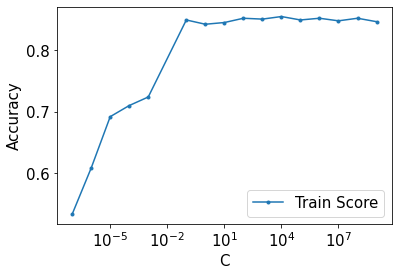

In [27]:
plt.figure()
plt.plot(C_range, train_scores,label="Train Score",marker='.')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

In [28]:
my_logreg.score(X_test, y_test)

0.8214285714285714

The test score for logistic regression on the test dataset is 82% which is decent.

In [29]:
# Scale data
from sklearn.preprocessing import StandardScaler

# instantiate it
scaler = StandardScaler()

# Fit it on the training data
scaler.fit(X_train)

# Transform
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [30]:
# decision tree model
from sklearn.tree import DecisionTreeClassifier

# Define range of hyperparameter values
depth_values = range(1,25)

train_scores = []

for d in depth_values:

    # Instnatiate & fit a model
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train_s, y_train)
    
    # Evaluate on train & validation
    train_scores.append(dt.score(X_train_s, y_train))

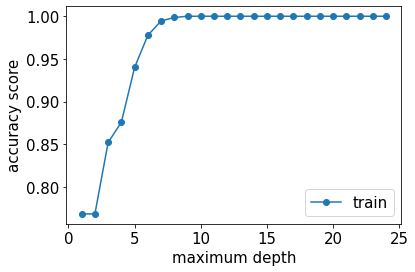

In [31]:
plt.figure()
plt.plot(depth_values, train_scores, label='train', marker='o')
plt.xlabel('maximum depth')
plt.ylabel('accuracy score')
plt.legend()
plt.show()

In [32]:
# re-fit models
# Fit optimized DT
dt_opt = DecisionTreeClassifier(max_depth = 2)
dt_opt.fit(X_train_s, y_train)
print('Decision Tree test accuracy:', dt_opt.score(X_test, y_test))

Decision Tree test accuracy: 0.4675324675324675


As can be seen above, the decision tree test accuracy is not as good as the logistic regression model. For the train model, the accuracy score reached almost 1 which could indicate that it was overfitting.